### RF in Sewer Pipes - Soil EM Properties

Given that sewer pipes, as all other pipes, are buried underground, the EM properties of the soil they are buried in is an important parameter. It is the soil that is the main factor in determining the attenuation rate of the sewer pipes. Additionally, these properties are also relevant for the case of direct communication between a robot inside the pipe and a station above ground.

The properties that we are interested in are the complex relative permittivity of the soil as a function of its constituents, i.e. sand, clay, and silt particles, its volumetric water content, and its temperature.

The figures in this notebook are often for a specific soil - manually changing some of the variable values is required to generate graphs for different combinations of soil, water content, and temperature.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itur_p527 as p527
from cycler import cycler

In [3]:
freqs = np.logspace(8, 12, 801)
temps = np.linspace(5, 25, 5, dtype='int')
water_vols = np.linspace(0.1, 0.9, 5)
freqs_ism = np.array([433e6, 868e6, 2.45e9, 5.8e9, 24.125e9, 60e9, 1225e9, 245e9])

In [4]:
test_soil_1 = p527.Soil(30.63, 13.48, 55.89)
test_soil_2 = p527.Soil(5.02, 47.38, 47.60)

In [5]:
test_er_1 = []
test_er_2 = []

for freq in freqs:
    test_er_1.append(p527.soil_permittivity(freq/1e9, 23, test_soil_1.p_sand, test_soil_1.p_clay, test_soil_1.p_silt, 0.5))
    test_er_2.append(p527.soil_permittivity(freq/1e9, 23, test_soil_2.p_sand, test_soil_2.p_clay, test_soil_2.p_silt, 0.5))

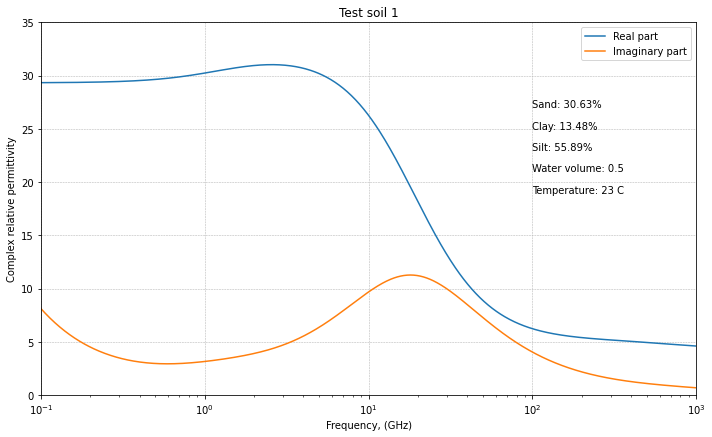

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10/1.618)
ax.semilogx(freqs/1e9, np.real(test_er_1), label='Real part')
ax.semilogx(freqs/1e9, np.imag(test_er_1), label='Imaginary part')
ax.set_xlim(np.min(freqs/1e9), np.max(freqs/1e9))
ax.set_ylim(0, 35)
ax.set_xlabel('Frequency, (GHz)')
ax.set_ylabel('Complex relative permittivity')
ax.set_title('Test soil 1')
ax.legend(loc='upper right')
ax.grid(ls='--', lw=0.5)
ax.text(1e2, 27, f'Sand: {test_soil_1.p_sand}%')
ax.text(1e2, 25, f'Clay: {test_soil_1.p_clay}%')
ax.text(1e2, 23, f'Silt: {test_soil_1.p_silt}%')
ax.text(1e2, 21, 'Water volume: 0.5')
ax.text(1e2, 19, 'Temperature: 23 C')
fig.tight_layout()
# fig.savefig('ITU-R P.527 Test Soil 1.png', dpi=600)

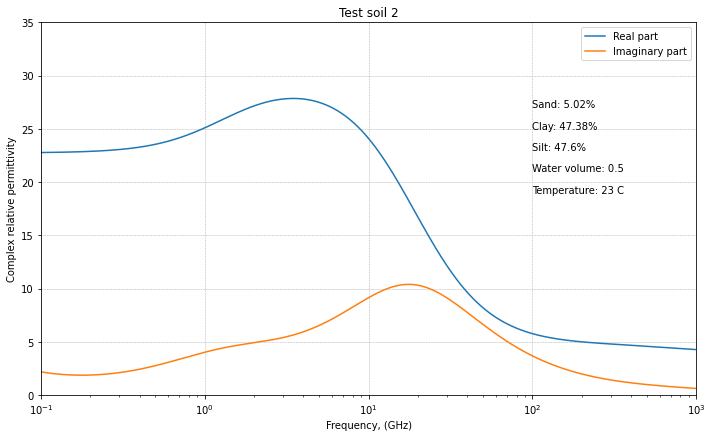

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10/1.618)
ax.semilogx(freqs/1e9, np.real(test_er_2), label='Real part')
ax.semilogx(freqs/1e9, np.imag(test_er_2), label='Imaginary part')
ax.set_xlim(np.min(freqs/1e9), np.max(freqs/1e9))
ax.set_ylim(0, 35)
ax.set_xlabel('Frequency, (GHz)')
ax.set_ylabel('Complex relative permittivity')
ax.set_title('Test soil 2')
ax.legend(loc='upper right')
ax.grid(ls='--', lw=0.5)
ax.text(1e2, 27, f'Sand: {test_soil_2.p_sand}%')
ax.text(1e2, 25, f'Clay: {test_soil_2.p_clay}%')
ax.text(1e2, 23, f'Silt: {test_soil_2.p_silt}%')
ax.text(1e2, 21, 'Water volume: 0.5')
ax.text(1e2, 19, 'Temperature: 23 C')
fig.tight_layout()
# fig.savefig('ITU-R P.527 Test Soil 2.png', dpi=600)

In [8]:
test_soil = p527.SOILS['loamy_sand']
test_data = np.zeros((np.size(temps), np.size(freqs)), dtype=complex)
test_water_vol = 0.5

In [9]:
for i, temp in enumerate(temps):
    for j, freq in enumerate(freqs):
        test_data[i, j] = p527.soil_permittivity(freq/1e9, temp, test_soil.p_sand, test_soil.p_clay, test_soil.p_silt, test_water_vol)

In [10]:
xv, yv = np.meshgrid(temps, freqs, indexing='ij')
levels = np.linspace(0, 50, 11)

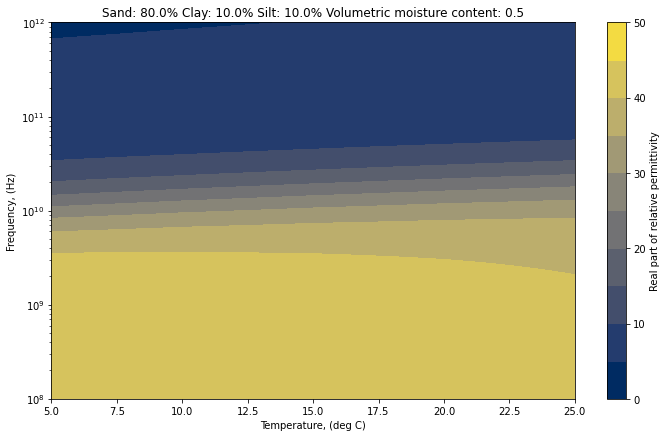

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10/1.618)
ax.set_yscale('log')
ax.set_xlim(np.min(temps), np.max(temps))
ax.set_ylim(np.min(freqs), np.max(freqs))
ax.set_xlabel('Temperature, (deg C)')
ax.set_ylabel('Frequency, (Hz)')
ax.set_title(f'Sand: {test_soil.p_sand}% Clay: {test_soil.p_clay}% Silt: {test_soil.p_silt}% Volumetric moisture content: {test_water_vol}')
contour = ax.contourf(xv, yv, np.real(test_data), levels, cmap='cividis')
cbar = fig.colorbar(contour)
cbar.set_label('Real part of relative permittivity')
fig.tight_layout()
# fig.savefig(f'Loamy Sand Fixed mv - {test_water_vol}.png', dpi=600, bbox_inches='tight')

In [12]:
test_data_2 = np.zeros((np.size(temps), np.size(water_vols)), dtype=complex)
test_freq = 2.45

In [13]:
for i, temp in enumerate(temps):
    for j, water_vol in enumerate(water_vols):
        test_data_2[i, j] = p527.soil_permittivity(test_freq, temp, test_soil.p_sand, test_soil.p_clay, test_soil.p_silt, water_vol)

In [14]:
xv, yv = np.meshgrid(temps, water_vols, indexing='ij')

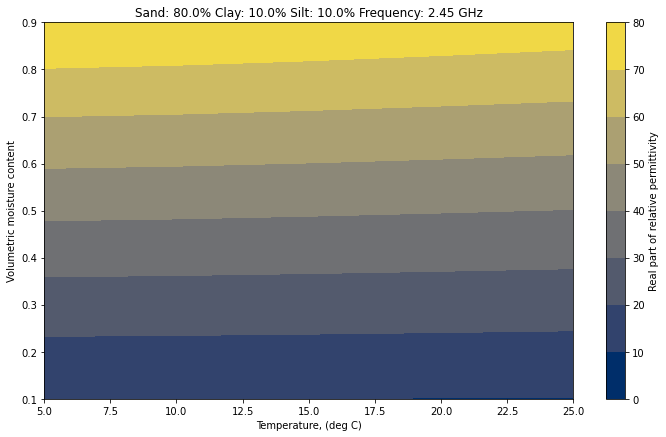

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10/1.618)
ax.set_xlim(np.min(temps), np.max(temps))
ax.set_ylim(np.min(water_vols), np.max(water_vols))
contour = ax.contourf(xv, yv, np.real(test_data_2), cmap='cividis')
cbar = fig.colorbar(contour)
ax.set_xlabel('Temperature, (deg C)')
ax.set_ylabel('Volumetric moisture content')
ax.set_title(f'Sand: {test_soil.p_sand}% Clay: {test_soil.p_clay}% Silt: {test_soil.p_silt}% Frequency: {test_freq} GHz')
cbar.set_label('Real part of relative permittivity')
fig.tight_layout()
# fig.savefig(f'Loamy Sand Fixed Frequency - {test_freq}.png', dpi=600, bbox_inches='tight')

In [16]:
test_data_3 = np.zeros((len(p527.SOILS), np.size(freqs)), dtype=complex)
test_temp = 15
test_water_vol = 0.1

In [17]:
for i, soil in enumerate(p527.SOILS):
    test_soil = p527.SOILS[soil]
    # print(soil)
    for j, freq in enumerate(freqs):
        test_data_3[i, j] = p527.soil_permittivity(freq/1e9, test_temp, test_soil.p_sand, test_soil.p_clay, test_soil.p_silt, test_water_vol)

In [18]:
xv, yv = np.meshgrid(np.arange(len(p527.SOILS)), freqs, indexing='ij')

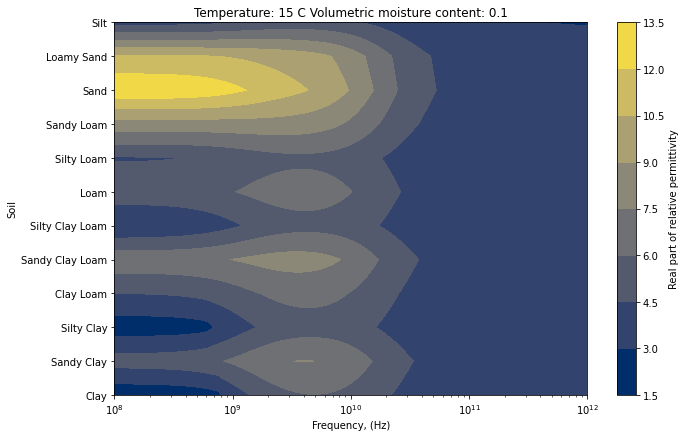

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10/1.618)
ax.set_xscale('log')
ax.set_xlim(np.min(freqs), np.max(freqs))
ax.set_ylim(0, 11)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
yticklabels = [soil_name.replace('_', ' ').title() for soil_name in p527.SOILS]
ax.set_yticklabels(yticklabels)
contour = ax.contourf(yv, xv, np.real(test_data_3), cmap='cividis')
cbar = fig.colorbar(contour)
ax.set_xlabel('Frequency, (Hz)')
ax.set_ylabel('Soil')
ax.set_title(f'Temperature: {test_temp} C Volumetric moisture content: {test_water_vol}')
cbar.set_label('Real part of relative permittivity')
fig.tight_layout()
# fig.savefig(f'Fixed Temperature - {test_temp} Fixed mv - {test_water_vol}.png', dpi=600, bbox_inches='tight')

In [20]:
test_data_3_real = np.real(test_data_3)
test_data_3_imag = np.imag(test_data_3)

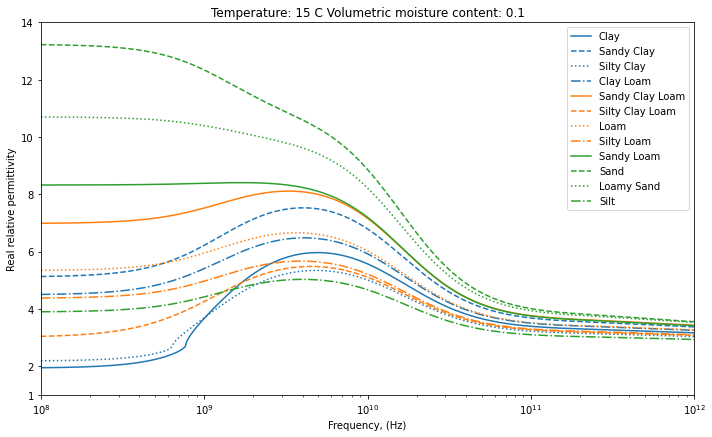

In [21]:
custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]) * cycler(linestyle=['-', '--', ':', '-.']))
fig, ax = plt.subplots()
ax.set_prop_cycle(custom_cycler)
color_idx = np.linspace(0, 1, len(p527.SOILS))
fig.set_size_inches(10, 10/1.618)
ax.set_xscale('log')
ax.set_xlim(np.min(freqs), np.max(freqs))
ax.set_ylim(1, 14)
ax.set_yticks([1, 2, 4, 6, 8, 10, 12, 14])
ax.set_yticklabels([1, 2, 4, 6, 8, 10, 12, 14])
for i, soil in enumerate(p527.SOILS):
#    print(soil)
    ax.plot(freqs, test_data_3_real[i, :], label=soil.replace('_', ' ').title())
ax.set_xlabel('Frequency, (Hz)')
ax.set_ylabel('Real relative permittivity')
ax.set_title(f'Temperature: {test_temp} C Volumetric moisture content: {test_water_vol}')
ax.legend(loc='upper right')
fig.tight_layout()
# fig.savefig(f'Line Plot Fixed Temperature - {test_temp} Fixed mv - {test_water_vol}.png', dpi=600, bbox_inches='tight')